# Capstone Project
###### by Jacynn

California is the Golden State when it comes to wine, it produces 90% of all of the wine made in United States. If California was a country, it would be the fourth-largest wine producer in the world behind France, Italy and Spain. The climate, the coastline and the very ground itself are the three major geographical features that contribute to the excellent California wine production.   

This dataset includes the wine production in California from 1980 to 2020. 
Data description:
- Year
- County
- Harvested Arce
- Yield (Unit/Acre)
- Production 
- Price (Dollars/Unit)
- Value

      The aim of this project is to forecast the value of county wine for the future. Linear regression model was used at first, result came out fine. Next, Lasso regression model and Ridge regression model were used to regularise to see if there will be any improvement. As another option, Neural network regression was also used in this project.
      
## Import Libraries and Dataset

In [108]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [109]:
#Read data and check head
wine=pd.read_csv('Californa_Wine_Production_1980_2020.csv')
wine.head()

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
0,2020,216299,GRAPESWINE,1,Alameda,2530.0,5.14,13000.0,1497.69,Tons,19470000
1,2020,216299,GRAPESWINE,5,Amador,5360.0,2.31,12400.0,1318.31,Tons,16347000
2,2020,216299,GRAPESWINE,9,Calaveras,579.0,3.06,1770.0,1325.99,Tons,2347000
3,2020,216299,GRAPESWINE,11,Colusa,747.0,6.02,4500.0,684.67,Tons,3081000
4,2020,216299,GRAPESWINE,13,ContraCosta,1940.0,4.69,9090.0,751.27,Tons,6829000


## Exploratory data analysis (EDA)
### Data Cleaning

In [110]:
#Find shape
wine.shape

(1315, 11)

In [111]:
#Check information and types of dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1315 non-null   int64  
 1   CommodityCode        1315 non-null   int64  
 2   CropName             1315 non-null   object 
 3   CountyCode           1315 non-null   int64  
 4   County               1315 non-null   object 
 5   HarvestedAcres       1302 non-null   float64
 6   Yield(Unit/Acre)     1266 non-null   float64
 7   Production           1278 non-null   float64
 8   Price(Dollars/Unit)  1278 non-null   float64
 9   Unit                 1279 non-null   object 
 10  Value(Dollars)       1315 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 113.1+ KB


In [112]:
#Check null values
wine.isnull().sum()

Year                    0
CommodityCode           0
CropName                0
CountyCode              0
County                  0
HarvestedAcres         13
Yield(Unit/Acre)       49
Production             37
Price(Dollars/Unit)    37
Unit                   36
Value(Dollars)          0
dtype: int64

In [113]:
#Find out null values rows (according to the most null values column)
wine[wine['Yield(Unit/Acre)'].isna()]

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
16,2020,216299,GRAPESWINE,57,Nevada,408.0,NaN,NaN,NaN,NaN,2666000
25,2020,216299,GRAPESWINE,81,SanMateo,176.0,NaN,NaN,NaN,NaN,1312000
62,2019,216299,GRAPESWINE,81,SanMateo,181.0,NaN,NaN,NaN,NaN,1341000
100,2018,216299,GRAPESWINE,81,SanMateo,126.0,NaN,NaN,NaN,Tons,1407000
137,2017,216299,GRAPESWINE,81,SanMateo,164.0,NaN,NaN,NaN,Tons,1182000
173,2016,216299,GRAPESWINE,81,SanMateo,152.0,NaN,NaN,NaN,Tons,703000
209,2015,216299,GRAPESWINE,81,SanMateo,165.0,NaN,NaN,NaN,Tons,677000
243,2014,216299,GRAPESWINE,81,SanMateo,154.0,NaN,NaN,NaN,Tons,1031000
278,2013,216299,GRAPESWINE,81,SanMateo,153.0,NaN,NaN,NaN,tons,1073000
314,2012,216299,GRAPESWINE,81,SanMateo,131.0,NaN,NaN,NaN,Tons,694000


Decided to drop San Mateo, Trinity and Nevada as they have continuous year without data in at least two columns.

In [114]:
#Drop counties 
wine = wine[wine['County']!='SanMateo']
wine = wine[wine['County']!='Trinity']
wine = wine[wine['County']!='Nevada']

In [115]:
#Check null values after dropping
wine.isnull().sum()

Year                   0
CommodityCode          0
CropName               0
CountyCode             0
County                 0
HarvestedAcres         0
Yield(Unit/Acre)       0
Production             0
Price(Dollars/Unit)    0
Unit                   7
Value(Dollars)         0
dtype: int64

In [116]:
#To check what is in 'Unit' column
set(wine.Unit)

{'ACRE', 'TON', 'TONS', 'Tons', nan, 'tons'}

In [117]:
wine['Unit'].value_counts()

TONS    631
Tons    356
TON     201
tons     33
ACRE      1
Name: Unit, dtype: int64

Drop the only one row with 'Acre' as unit.

In [118]:
#Drop row
wine = wine[wine['Unit']!='ACRE']

In [119]:
#Check after dropping
set(wine.Unit)

{'TON', 'TONS', 'Tons', nan, 'tons'}

In [120]:
#Find out null value rows
wine[wine['Unit'].isna()]

,Year,CommodityCode,CropName,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Unit,Value(Dollars)
47,2019,216299,GRAPESWINE,41,Marin,195.0,2.08,406.0,3371.92,NaN,1369000
1122,1986,216299,GRAPESWINE,9,Calaveras,135.0,2.22,300.0,340.00,NaN,102000
1129,1986,216299,GRAPESWINE,39,Madera,40267.0,8.71,350734.0,112.00,NaN,39311000
1130,1986,216299,GRAPESWINE,45,Mendocino,10494.0,4.09,42938.0,395.00,NaN,16960300
1140,1986,216299,GRAPESWINE,73,SanDiego,90.0,1.40,126.0,330.00,NaN,41600
1144,1986,216299,GRAPESWINE,85,SantaClara,1600.0,3.00,4800.0,400.00,NaN,1920000
1147,1986,216299,GRAPESWINE,99,Stanislaus,17211.0,8.70,149800.0,125.00,NaN,18794000


Each county has only one null unit, I believe that it is more likely to be a mistake.

[TON, TONS, Tons and tons] are the same unit, will drop this column.

In [121]:
#Find out what is in 'Commodity Code' column
set(wine.CommodityCode)

{216299}

In [122]:
#Find out what is in 'Crop Name' column
set(wine.CropName)

{'GRAPESWINE'}

Both CommodityCode and CropName have only one type of data, as well as unit column, so these 3 columns were dropped. 

In [123]:
#Drop all the columns with just one type of data
wine.drop(columns=['CommodityCode','CropName','Unit'], inplace=True)
wine.head()

,Year,CountyCode,County,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Value(Dollars)
0,2020,1,Alameda,2530.0,5.14,13000.0,1497.69,19470000
1,2020,5,Amador,5360.0,2.31,12400.0,1318.31,16347000
2,2020,9,Calaveras,579.0,3.06,1770.0,1325.99,2347000
3,2020,11,Colusa,747.0,6.02,4500.0,684.67,3081000
4,2020,13,ContraCosta,1940.0,4.69,9090.0,751.27,6829000


In [124]:
#Describe dataset
wine.describe()

,Year,CountyCode,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Value(Dollars)
count,1228.000000,1228.000000,1228.000000,1228.000000,1.228000e+03,1228.000000,1.228000e+03
mean,2000.931596,57.913681,15410.339577,5.225798,1.064947e+05,920.379479,6.377606e+07
std,11.856320,31.386785,20875.466632,3.294774,1.733539e+05,1267.408949,1.270209e+08
min,1980.000000,1.000000,3.000000,0.060000,3.800000e+01,74.000000,1.760000e+04
25%,1991.000000,33.000000,1234.000000,2.957500,4.209750e+03,316.600000,2.528500e+06
50%,2002.000000,61.000000,4115.000000,4.090000,2.125000e+04,696.335000,1.535950e+07
75%,2011.000000,83.000000,25507.250000,7.362500,1.347640e+05,1229.010000,7.179048e+07
max,2020.000000,115.000000,128613.000000,25.000000,1.040100e+06,36342.070000,2.030002e+09


In [125]:
#Correlation of each features
wine.corr()

,Year,CountyCode,HarvestedAcres,Yield(Unit/Acre),Production,Price(Dollars/Unit),Value(Dollars)
Year,1.000000,-0.018544,0.107177,0.037134,0.088324,0.297975,0.250255
CountyCode,-0.018544,1.000000,0.022885,-0.023703,-0.075315,0.051365,0.113378
HarvestedAcres,0.107177,0.022885,1.000000,0.377803,0.897481,0.046824,0.647487
Yield(Unit/Acre),0.037134,-0.023703,0.377803,1.000000,0.567156,-0.320273,0.105706
Production,0.088324,-0.075315,0.897481,0.567156,1.000000,-0.163502,0.467675
Price(Dollars/Unit),0.297975,0.051365,0.046824,-0.320273,-0.163502,1.000000,0.251770
Value(Dollars),0.250255,0.113378,0.647487,0.105706,0.467675,0.251770,1.000000


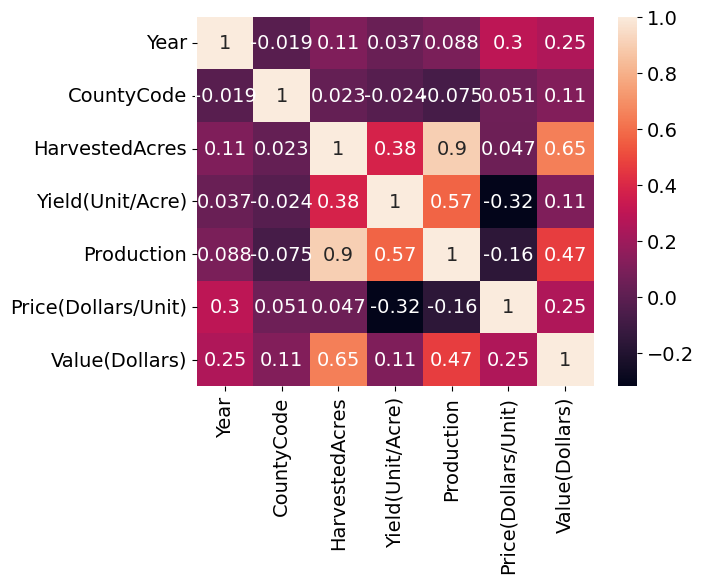

In [126]:
#heat map of correlation 
sns.heatmap(wine.corr(), annot=True)
plt.show()

From the graph above, harvested acres and production have the strongest correlation (it has 0.9 that is really close to 1), which make sense as the more harvested grapes the more the production will have. Harvested acres and value in dollars have the second strong correlation, which is 0.65. 

## Data Visualization

#### Total production from year 1980 to 2020

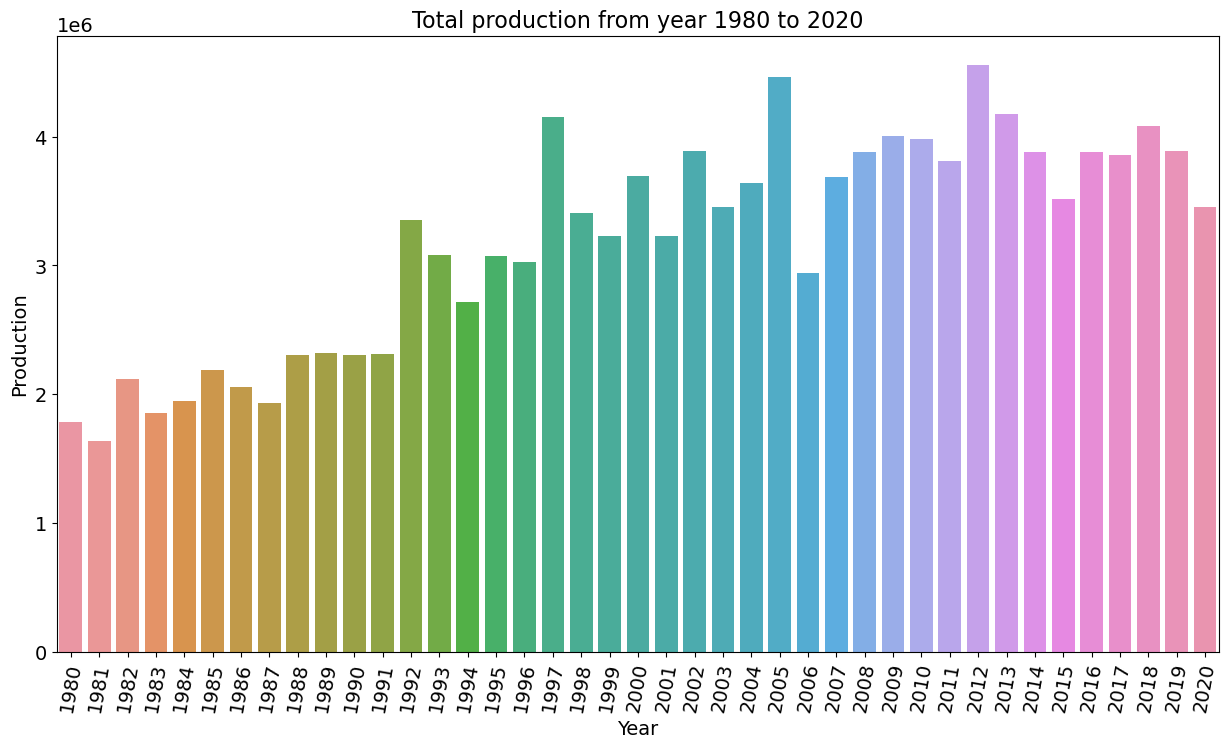

In [127]:
#Year vs production
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=wine,x='Year', y='Production', estimator=np.sum, ci=None)
plt.xticks(rotation=80)
plt.title('Total production from year 1980 to 2020', fontsize=16)
plt.show()

#### Total value from year 1980 to 2020

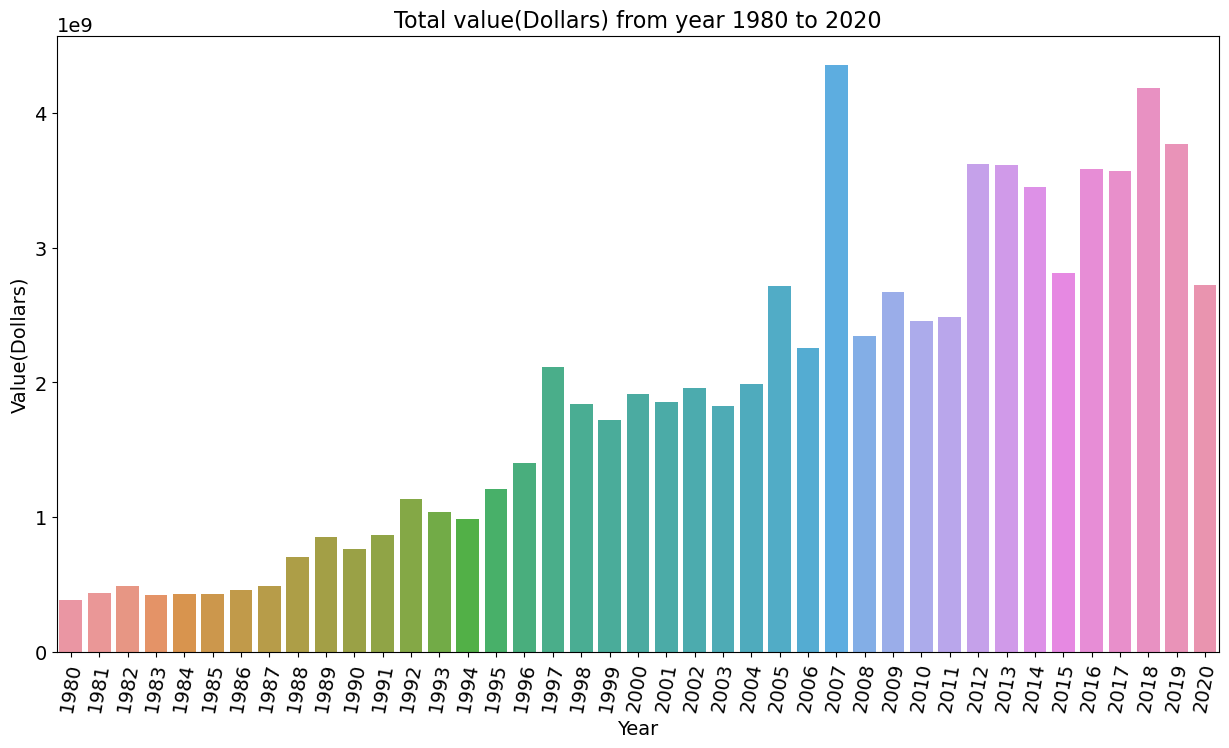

In [128]:
#Year vs value (compare with above)
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=wine,x='Year', y='Value(Dollars)', estimator=np.sum, ci=None)
plt.title('Total value(Dollars) from year 1980 to 2020', fontsize=16)
plt.xticks(rotation=80)
plt.show()

From both graph above, the total production slighly changes from year to year but for the total value from year to year, there is a sudden increase of value in year 2007. I had searched through internet but yet to find out the reason behind. On Statista website, there is a graph 'Retail value of Californian wine maket in US from 2006-2021 shows that no huge difference in value.

#### Total production of each county

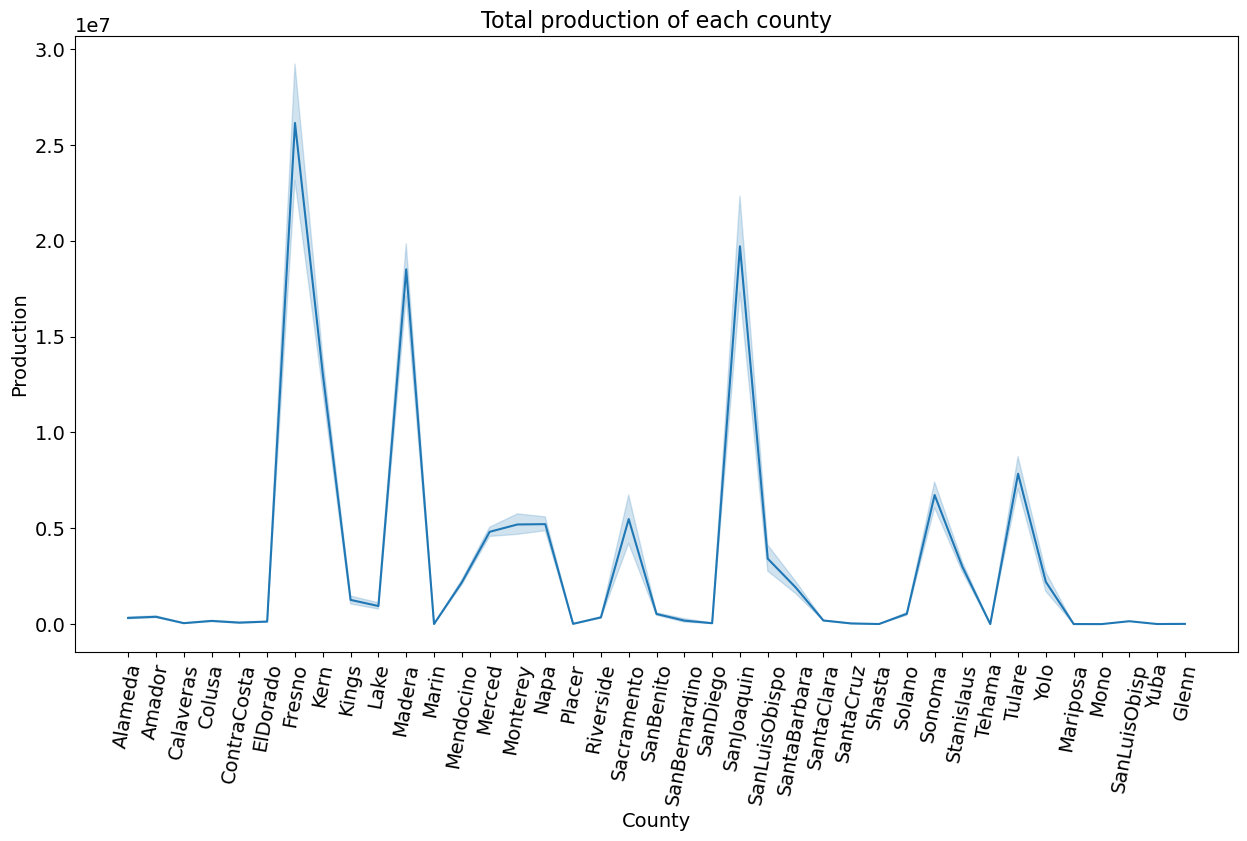

In [129]:
#County vs production
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=wine,x='County', y='Production', estimator=np.sum)
plt.xticks(rotation=80)
plt.title('Total production of each county', fontsize=16)
plt.show()

#### Total value of each county

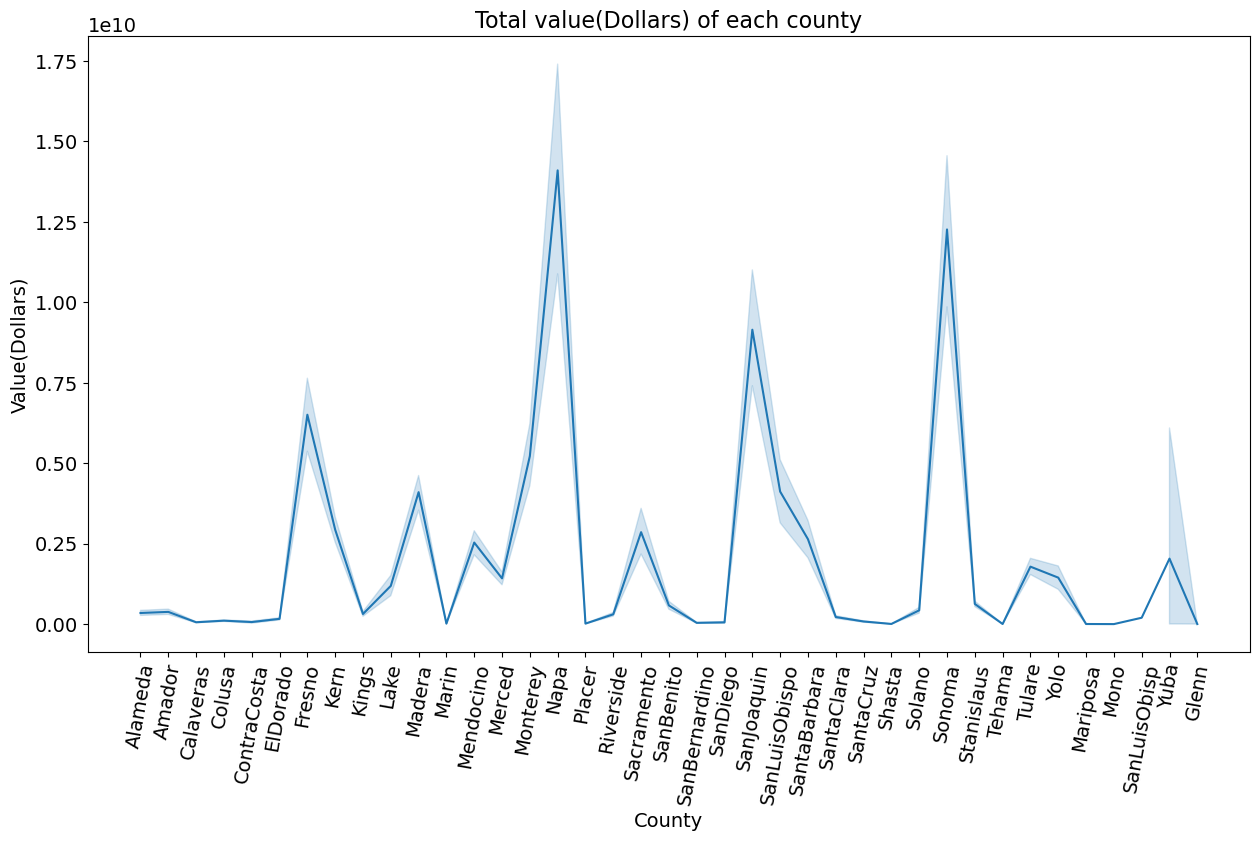

In [130]:
#County vs value (compare with above)
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=wine,x='County', y='Value(Dollars)', estimator=np.sum)
plt.xticks(rotation=80)
#plt.yscale('log')
plt.title('Total value(Dollars) of each county', fontsize=16)
plt.show()

By comparing both graphs above, the relationship between total production and total value of each couny is inversely proportional. For example Fresno has the most wine production but do not have high value on the wine product. Napa and Sonoma, popular county of wine, they have average production but with high value of wine. 

#### Top 10 valued wine county

In [131]:
#sum of value of each county
value_sum = pd.DataFrame(wine.groupby(['County'])['Value(Dollars)'].sum())
value_sum

,Value(Dollars)
County,
Alameda,345733600
Amador,379886384
Calaveras,57386400
Colusa,107282000
ContraCosta,64051000
ElDorado,163407000
Fresno,6507842000
Glenn,1772000
Kern,2935242000


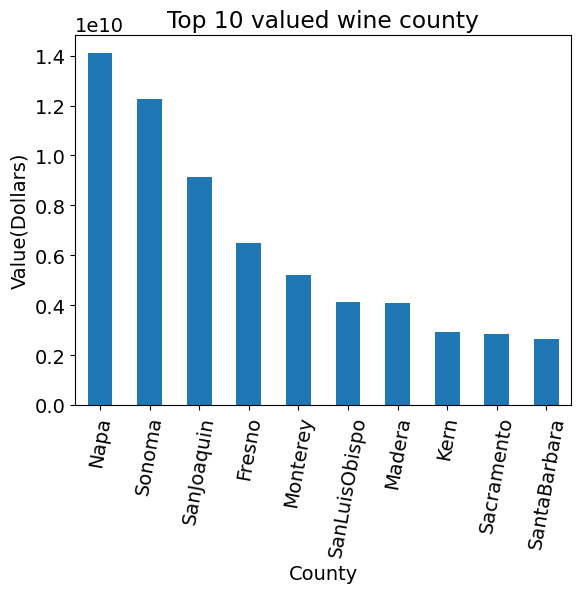

In [132]:
#sort values in descending order and plot graph
value_sum.sort_values(by=['Value(Dollars)'], ascending=False).head(10).plot(kind='bar', legend=None)
plt.xticks(rotation=80)
plt.ylabel('Value(Dollars)')
plt.title('Top 10 valued wine county')
plt.show()

#### Top 10 highest price county

In [133]:
#sum of production of each county
price_sum = pd.DataFrame(wine.groupby(['County'])['Price(Dollars/Unit)'].sum())
price_sum

,Price(Dollars/Unit)
County,
Alameda,38354.33
Amador,33978.23
Calaveras,37359.19
Colusa,6521.06
ContraCosta,7026.58
ElDorado,36313.49
Fresno,9536.66
Glenn,300.00
Kern,9055.99


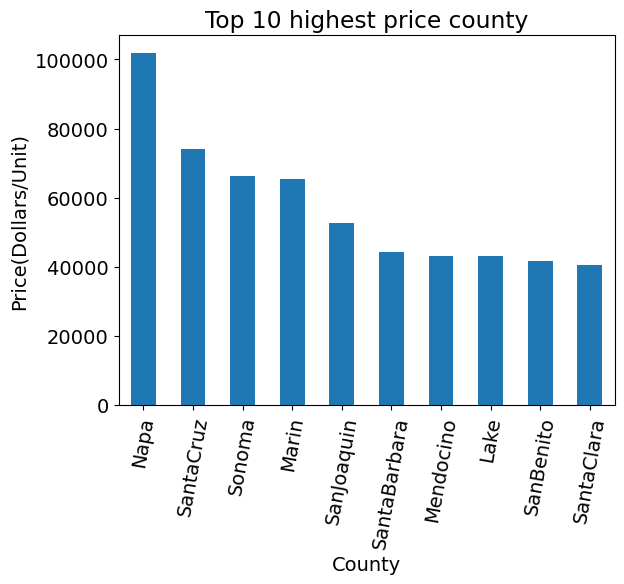

In [134]:
### sort values in descending order and plot graph
price_sum.sort_values(by=['Price(Dollars/Unit)'], ascending=False).head(10).plot(kind='bar', legend=None)
plt.xticks(rotation=80)
plt.ylabel('Price(Dollars/Unit)')
plt.title('Top 10 highest price county')
plt.show()

#### Top 10 most production county

In [135]:
#sum of production of each county
production_sum = pd.DataFrame(wine.groupby(['County'])['Production'].sum())
production_sum

,Production
County,
Alameda,322060.0
Amador,382340.0
Calaveras,49485.0
Colusa,165400.0
ContraCosta,76850.0
ElDorado,131398.0
Fresno,26141440.0
Glenn,11812.0
Kern,13051870.0


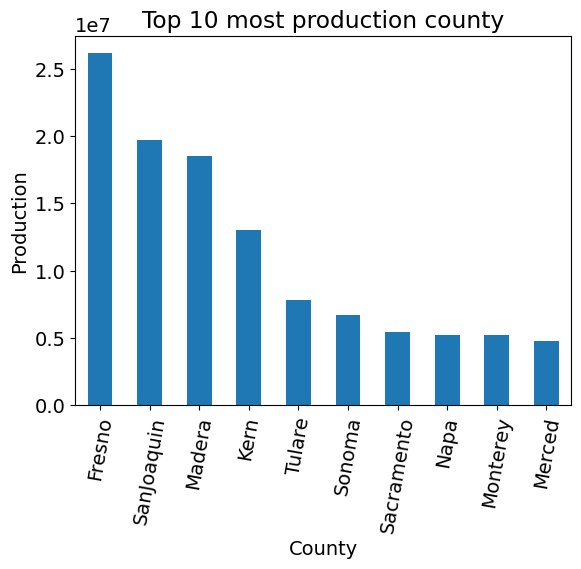

In [136]:
#sort values in descending order and plot graph
production_sum.sort_values(by=['Production'], ascending=False).head(10).plot(kind='bar', legend=None)
plt.xticks(rotation=80)
plt.ylabel('Production')
plt.title('Top 10 most production county')
plt.show()

Further looked into the top 10 county for total production and total value. We can clearly compare the top 10 county of value vs production. According to the popularity in California wine, high production do not necessary have high value, (eg. Napa has the highest value of wine but do not have high production. Napa is 20% of Fresno production but Fresno value is only 46% of Napa). So, in order to predict the value of the county wine, both price and production have a big impact. 

#### Top 10 pricey wine year

In [137]:
#find average price of each year
price_avg = pd.DataFrame(wine.groupby(['Year'])['Price(Dollars/Unit)'].mean())
price_avg

,Price(Dollars/Unit)
Year,
1980,311.181818
1981,365.909091
1982,333.379310
1983,328.935484
1984,314.333333
1985,294.035714
1986,320.862069
1987,363.933333
1988,461.928571


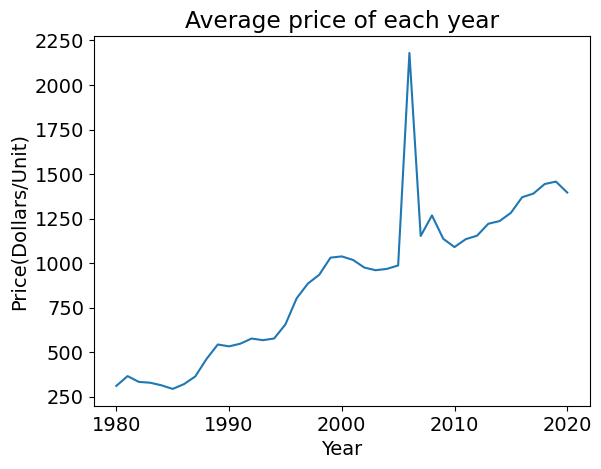

In [138]:
#plot graph on year vs average price
plt.plot(price_avg)
plt.xlabel('Year')
plt.ylabel('Price(Dollars/Unit)')
plt.title('Average price of each year')
plt.show()

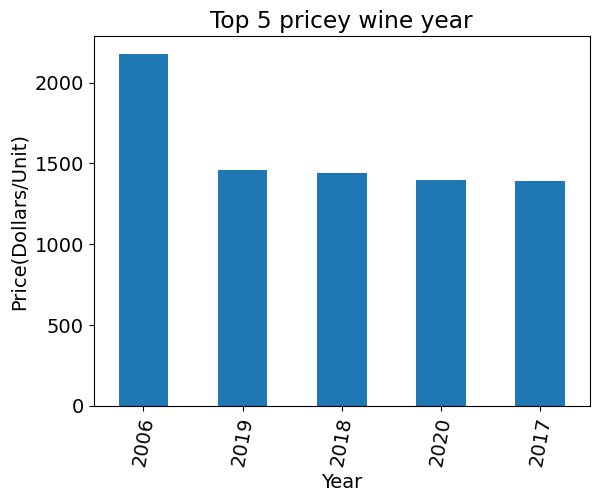

In [139]:
price_avg.sort_values(by=['Price(Dollars/Unit)'], ascending=False).head(5).plot(kind='bar', legend=None)
plt.xticks(rotation=80)
plt.ylabel('Price(Dollars/Unit)')
plt.title('Top 5 pricey wine year')
plt.show()

Just for curiosity to see which year has the highest average price. Suprisingly that 2016 was the highest, but I could not find the reason/evidence that support the sudden increase price in 2016. 

## Split Dataset

In [140]:
#Define X and y
X=wine.drop(columns=['Value(Dollars)','County'])
y=wine['Value(Dollars)']

In [141]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [142]:
#Standardize dataset
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

#log value for target variable
y_train=np.log(y_train)
y_test = np.log(y_test)

In [143]:
#Find shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(859, 6) (369, 6) (859,) (369,)


### Linear Regression

In [144]:
#Create model
lr=LinearRegression()

#Fit model
lr.fit(X_train, y_train)

LinearRegression()

In [145]:
#Find score
print('Train R2 score: %.4f' % lr.score(X_train,y_train))
print('Test R2 score: %.4f' % lr.score(X_test,y_test))

Train R2 score: 0.6674
Test R2 score: 0.6057


#### Prediction on test set

In [146]:
#Prediction
y_pred=lr.predict(X_test)

In [147]:
#Find out mean squared error 
print('Mean square error: %.4f' % mean_squared_error(y_test, y_pred))

#Find out root mean squared error 
print('Root mean squared error R2 score: %.4f' % np.sqrt(mean_squared_error(y_test, y_pred)))

Mean square error: 1.9975
Root mean squared error R2 score: 1.4133


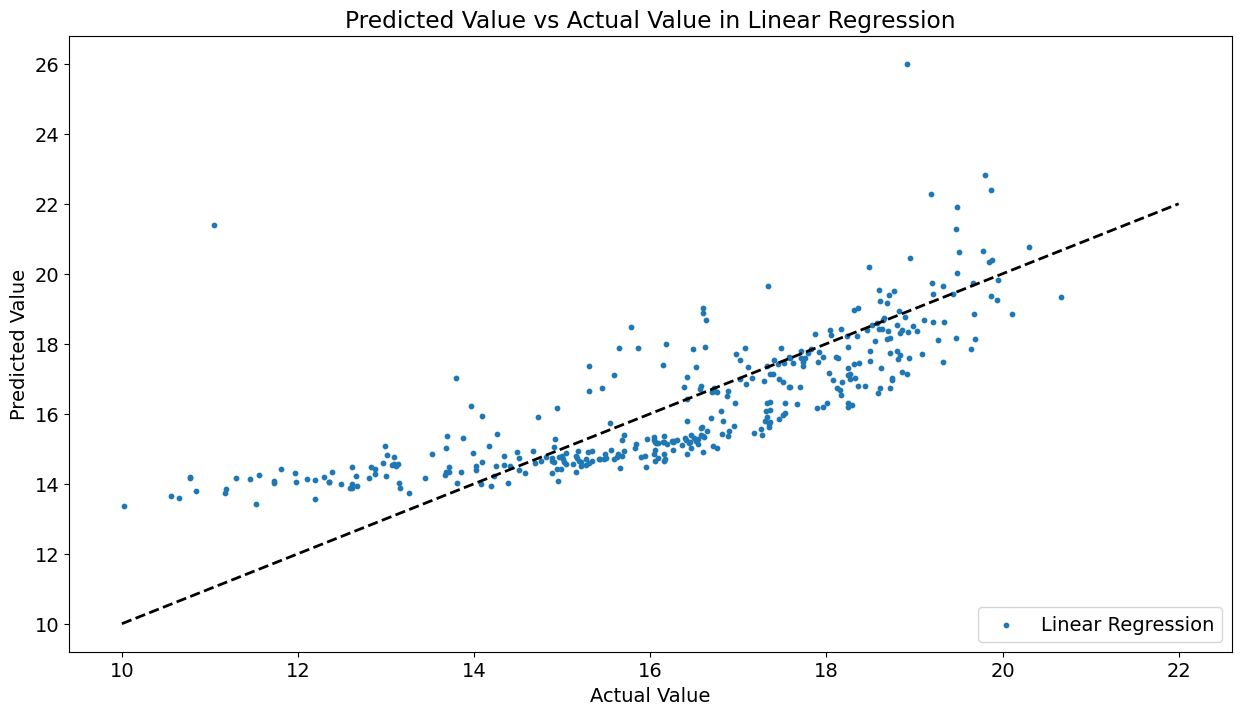

In [148]:
#Plot scatter graph for visualization
plt.figure(figsize=[15,8])
plt.scatter(y_test, y_pred, s=10, label='Linear Regression')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted Value vs Actual Value in Linear Regression')
plt.plot([10, 22], [10, 22], 'k--', linewidth=2)
plt.legend(loc='lower right')
plt.show()

## Regularization
### Ridge regression

In [149]:
#Create model
ridge = Ridge()

# keep track of the intermediate results for coefficients and errors
ridge_coefs = []
ridge_errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-2, 8, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    ridge_errors.append(mean_squared_error(ridge.coef_, lr.coef_))

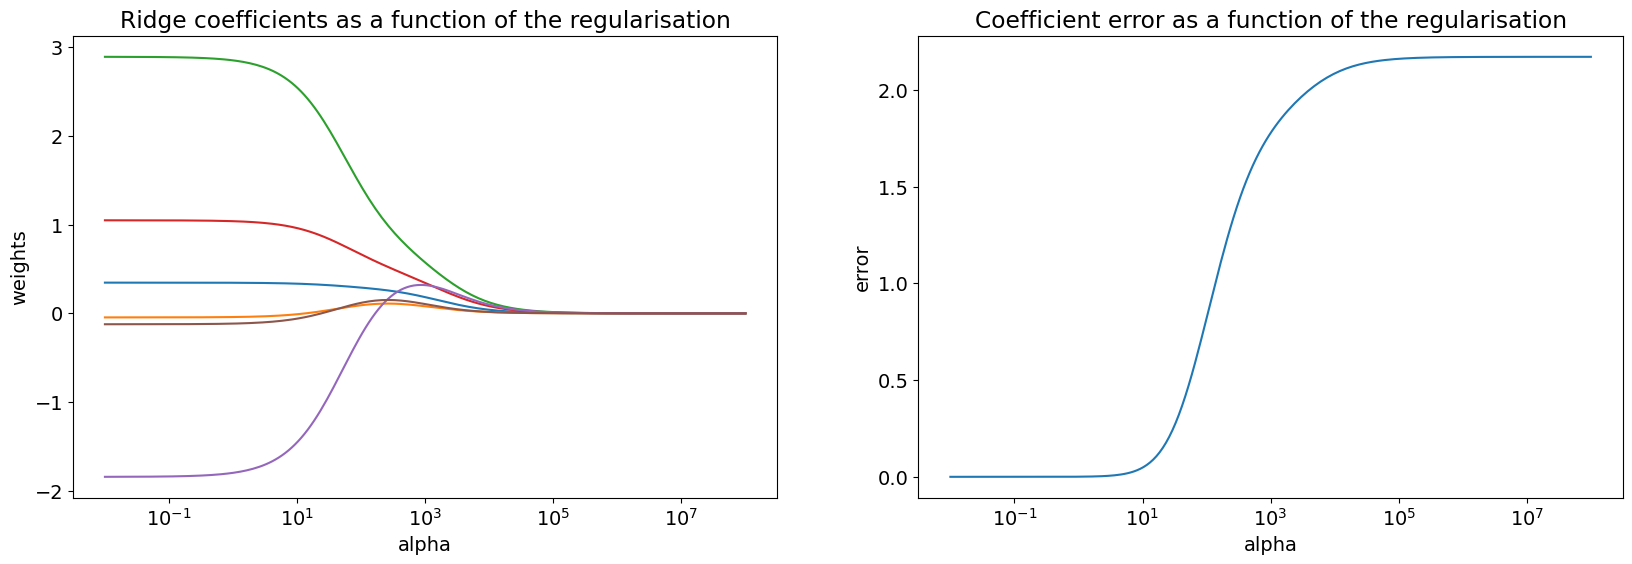

In [150]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, ridge_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, ridge_errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [151]:
#Find optimal ridge model and alpha
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print('Optimal Alpha: %.4f' % optimal_ridge.alpha_)
print('Ridge Train R2 score: %.4f'% optimal_ridge.score(X_train, y_train))
print('Ridge Test R2 score: %.4f'% optimal_ridge.score(X_test, y_test))

Optimal Alpha: 104.7371
Ridge Train R2 score: 0.6078
Ridge Test R2 score: 0.5755


##### Grid Search CV

In [152]:
ridge_params = {'alpha':[100,150,200, 250,300]}

In [153]:
gs_ridge=GridSearchCV(Ridge(), ridge_params, cv=10, verbose=1)
gs_ridge.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [100, 150, 200, 250, 300]}, verbose=1)

In [154]:
print(gs_ridge.best_params_)
print(gs_ridge.best_score_)

{'alpha': 100}
0.5546328631179344


In [155]:
print('GridSearch Ridge Train score: %.4f'% gs_ridge.score(X_train, y_train))
print('GridSearch Ridge Test score: %.4f'% gs_ridge.score(X_test, y_test))

GridSearch Ridge Train score: 0.6098
GridSearch Ridge Test score: 0.5771


After doing GridSearch, I have realized that RidgeCV is Ridge regression with built-in cross-validation. They have pretty much the same results on R2 score.

#### Prediction on test set

In [156]:
#Prediction
y_pred_ridge=optimal_ridge.predict(X_test)

In [157]:
#Find out mean squared error 
print('Mean square error: %.4f' % mean_squared_error(y_test, y_pred_ridge))

#Find out r2 score
print('Root mean squared error R2 score: %.4f' % np.sqrt(mean_squared_error(y_test,y_pred_ridge)))

Mean square error: 2.1506
Root mean squared error R2 score: 1.4665


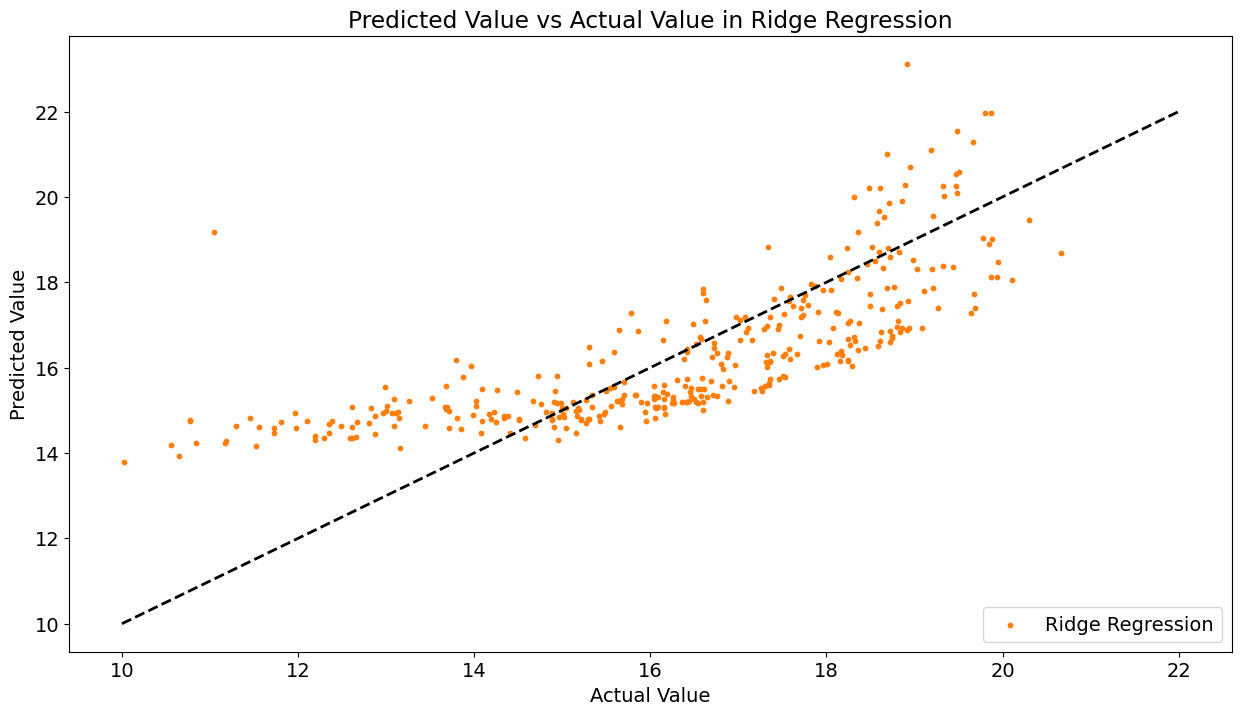

In [158]:
#Plot scatter graph for visualization
plt.figure(figsize=[15,8])
plt.scatter(y_test, y_pred_ridge, s=10,  label='Ridge Regression', c='tab:orange')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted Value vs Actual Value in Ridge Regression')
plt.plot([10, 22], [10, 22], 'k--', linewidth=2)
plt.legend(loc='lower right')
plt.show()

### Lasso Regression

In [159]:
# Create model
lasso = Lasso()

# keep track of the intermediate results for coefficients and errors
lasso_coefs = []
lasso_errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-5,5,200)

# Train the model with different regularisation strengths
for l in lasso_alphas:
    lasso.set_params(alpha = l)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)
    lasso_errors.append(mean_squared_error(lasso.coef_, lr.coef_))

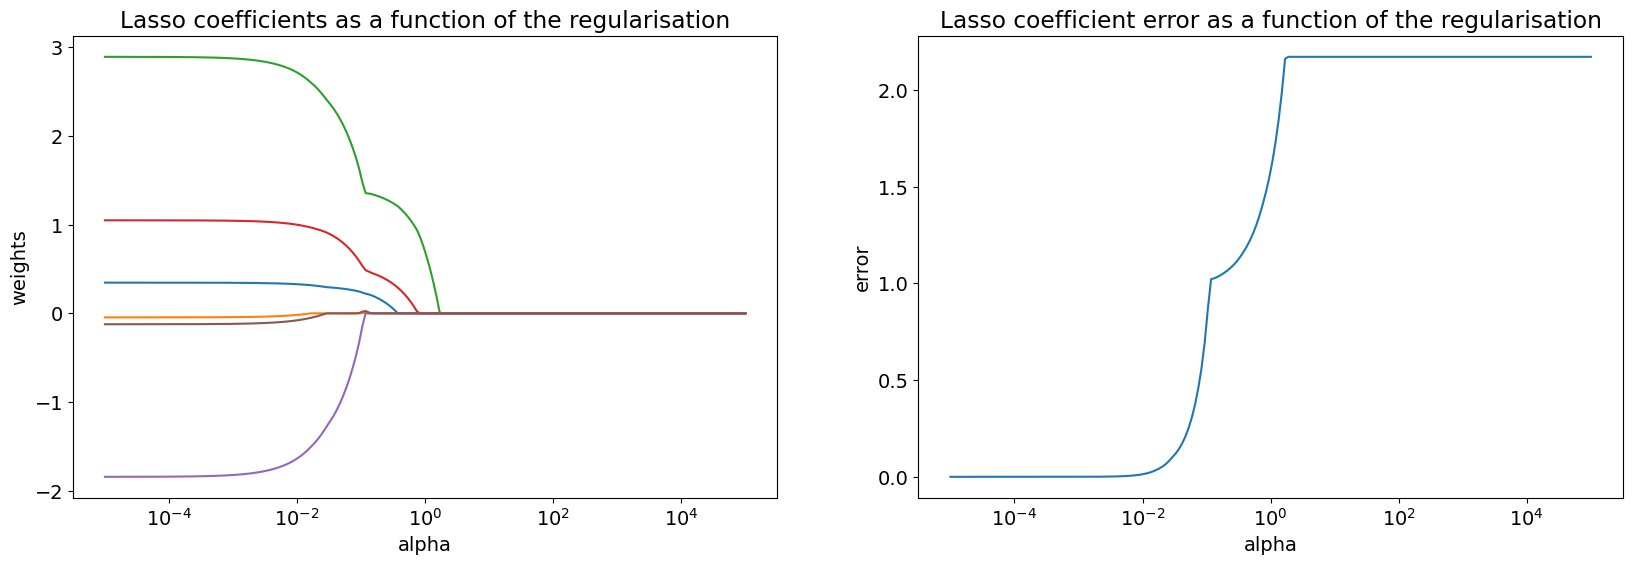

In [160]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, lasso_coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, lasso_errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Lasso coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [161]:
# Find Optimal Lasso and alpha
optimal_lasso = LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X_train, y_train)
print('Optimal Alpha:', optimal_lasso.alpha_)
print('Lasso Train R2 Score: %.4f' % optimal_lasso.score(X_train, y_train))
print('Lasso Test R2 Score: %.4f'% optimal_lasso.score(X_test, y_test))

Optimal Alpha: 0.16638168860761307
Lasso Train R2 Score: 0.5801
Lasso Test R2 Score: 0.5450


#### Prediction on test set

In [162]:
#Prediction
y_pred_lasso=optimal_lasso.predict(X_test)

In [163]:
#Find out mean squared error 
print('Mean square error: %.4f' % mean_squared_error(y_test, y_pred_lasso))

#Find out root mean squared error
print('Root mean squared error R2 score: %.4f' % np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Mean square error: 2.3053
Root mean squared error R2 score: 1.5183


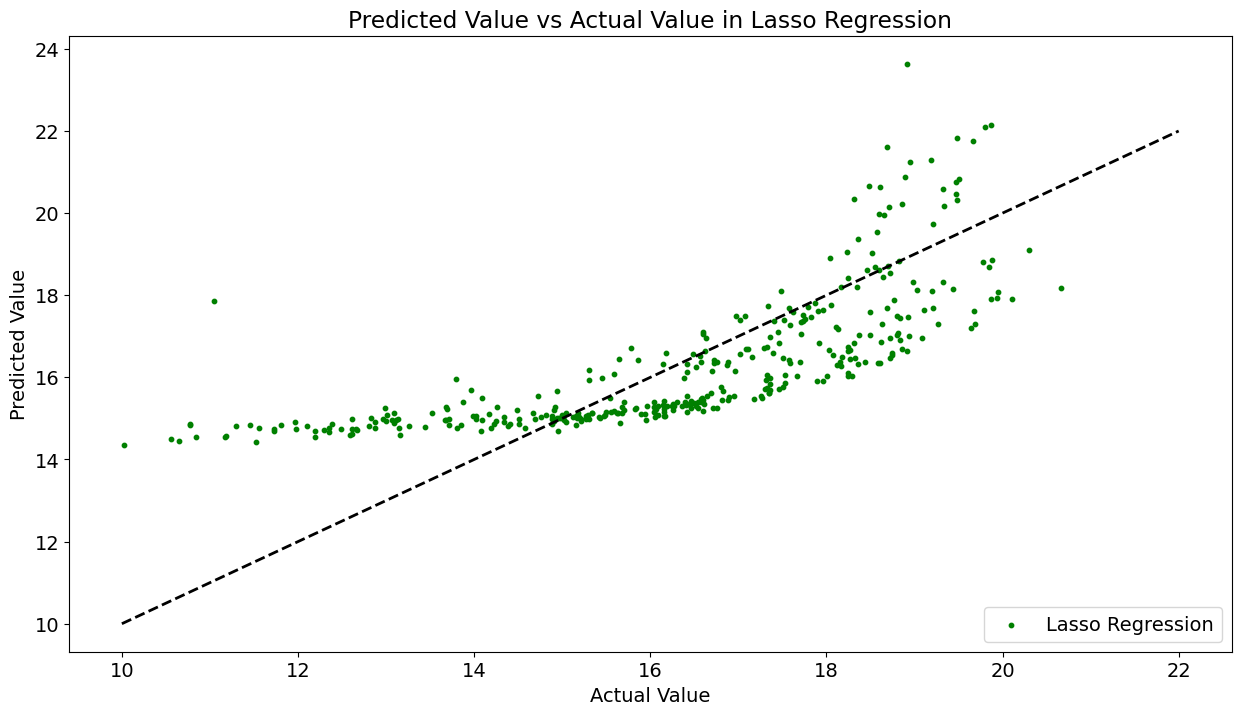

In [164]:
#Plot scatter graph for visualization
plt.figure(figsize=[15,8])
plt.scatter(y_test, y_pred_lasso, s=10,  label='Lasso Regression', c='g')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted Value vs Actual Value in Lasso Regression')
plt.plot([10, 22], [10, 22], 'k--', linewidth=2)
plt.legend(loc='lower right')
plt.show()

### Scatter Plot of prediction set on different regression model

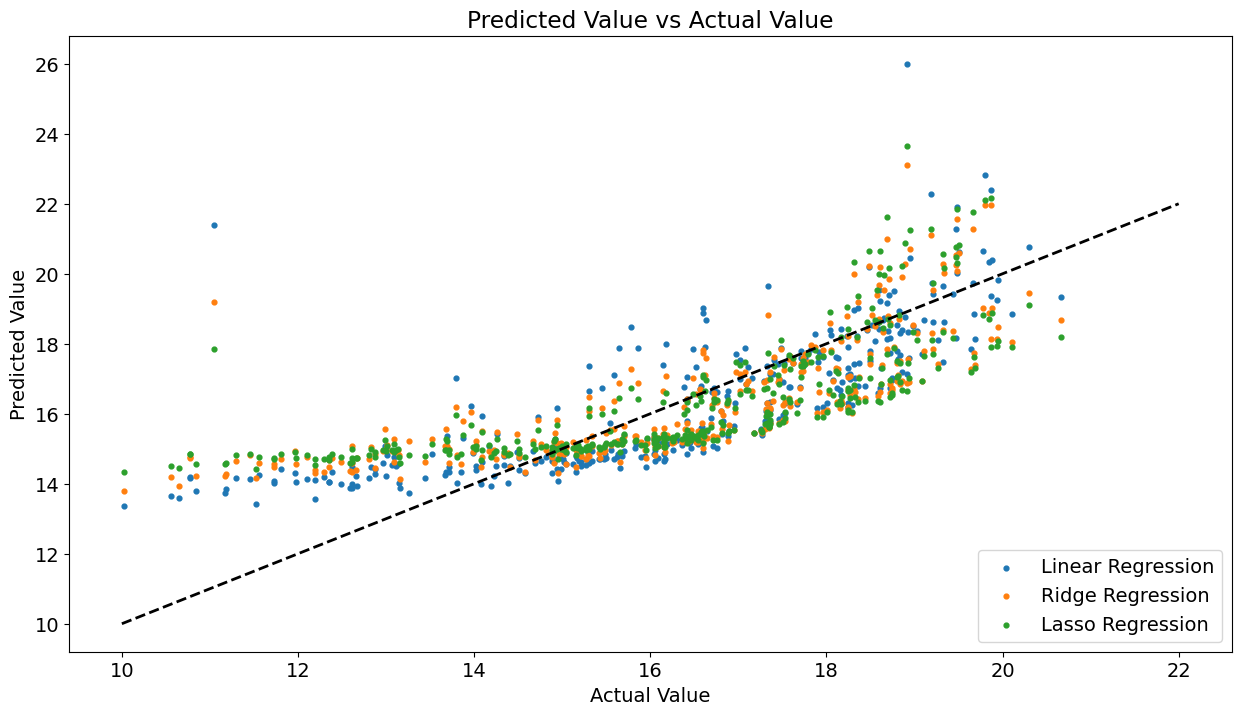

In [165]:
#Plot scatter graph for visualization
plt.figure(figsize=[15,8])
plt.scatter(y_test, y_pred, label='Linear Regression', s=12)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', s=12)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', s=12)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title( 'Predicted Value vs Actual Value')
plt.plot([10, 22], [10, 22], 'k--', linewidth=2)
plt.legend(loc='lower right')
plt.show()

Not too much difference on these 3 models, they struggle to predict lower values. It predict more accurate when it comes to higher value.

## Neural Network

In [166]:
# Set up the model architecture
model = Sequential()
n_cols = X.shape[1]

In [167]:
# Add the first hidden layer
model.add(Dense(50, activation = 'relu', input_shape = (n_cols, )))

#Add the second hidden layer
model.add(Dense(30, activation = 'relu'))

#Add the second hidden layer
model.add(Dense(20, activation = 'relu'))

#Add the third hidden layer
model.add(Dense(10, activation = 'relu'))

# Add the fourth hidden layer
model.add(Dense(5, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [168]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 50)                350       
                                                                 
 dense_26 (Dense)            (None, 30)                1530      
                                                                 
 dense_27 (Dense)            (None, 20)                620       
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 5)                 55        
                                                                 
 dense_30 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2,771
Trainable params: 2,771
Non-traina

In [169]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [170]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 50,
    verbose = 1)

Epoch 1/50
65/65 [==============================] - 6s 17ms/step - loss: 211.0783 - mse: 211.0783 - val_loss: 91.0959 - val_mse: 91.0958
Epoch 2/50
65/65 [==============================] - 1s 8ms/step - loss: 40.6217 - mse: 40.6217 - val_loss: 18.3986 - val_mse: 18.3986
Epoch 3/50
65/65 [==============================] - 0s 7ms/step - loss: 21.1186 - mse: 21.1186 - val_loss: 13.2346 - val_mse: 13.2346
Epoch 4/50
65/65 [==============================] - 1s 13ms/step - loss: 14.5511 - mse: 14.5511 - val_loss: 10.9873 - val_mse: 10.9873
Epoch 5/50
65/65 [==============================] - 1s 11ms/step - loss: 10.7147 - mse: 10.7147 - val_loss: 9.5925 - val_mse: 9.5925
Epoch 6/50
65/65 [==============================] - 1s 14ms/step - loss: 8.0235 - mse: 8.0235 - val_loss: 7.4445 - val_mse: 7.4445
Epoch 7/50
65/65 [==============================] - 0s 7ms/step - loss: 5.8949 - mse: 5.8949 - val_loss: 5.6520 - val_mse: 5.6520
Epoch 8/50
65/65 [==============================] - 0s 7ms/step - 

In [171]:
predictions = model.predict(X_test)
predictions

12/12 [==============================] - 0s 3ms/step


array([[15.828201 ],
       [16.665243 ],
       [11.533043 ],
       [19.229008 ],
       [16.02896  ],
       [20.466896 ],
       [18.674458 ],
       [20.089972 ],
       [17.584328 ],
       [18.385344 ],
       [20.19335  ],
       [18.741734 ],
       [19.358213 ],
       [16.762125 ],
       [15.815775 ],
       [13.72408  ],
       [17.769203 ],
       [18.695858 ],
       [15.489161 ],
       [18.095684 ],
       [15.605483 ],
       [17.218136 ],
       [20.169186 ],
       [14.962048 ],
       [16.678047 ],
       [15.261539 ],
       [14.864125 ],
       [14.715329 ],
       [19.578138 ],
       [11.174583 ],
       [17.544777 ],
       [19.450974 ],
       [15.078717 ],
       [16.063437 ],
       [16.38074  ],
       [15.515559 ],
       [18.687641 ],
       [12.243918 ],
       [18.340162 ],
       [17.051949 ],
       [19.010746 ],
       [15.790302 ],
       [18.257748 ],
       [12.621823 ],
       [17.034067 ],
       [14.640261 ],
       [13.473743 ],
       [17.08

In [172]:
len(predictions)

369

In [173]:
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

12/12 [==============================] - 0s 3ms/step - loss: 0.5035 - mse: 0.5035

Test loss: 0.503527, Test accuracy: 0.503527


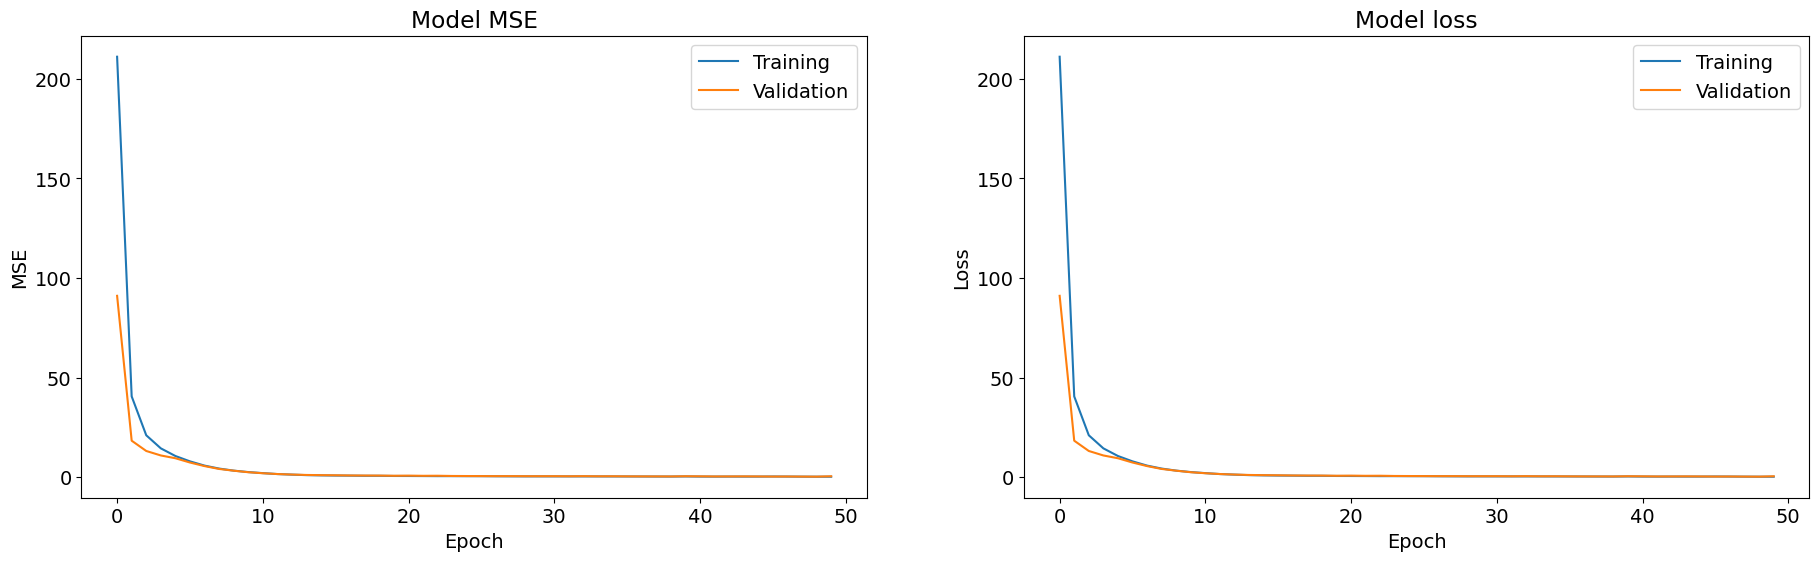

In [174]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

MSE has no improvements after 10 epoch, it reached the lowest which is almost 0.

In [175]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

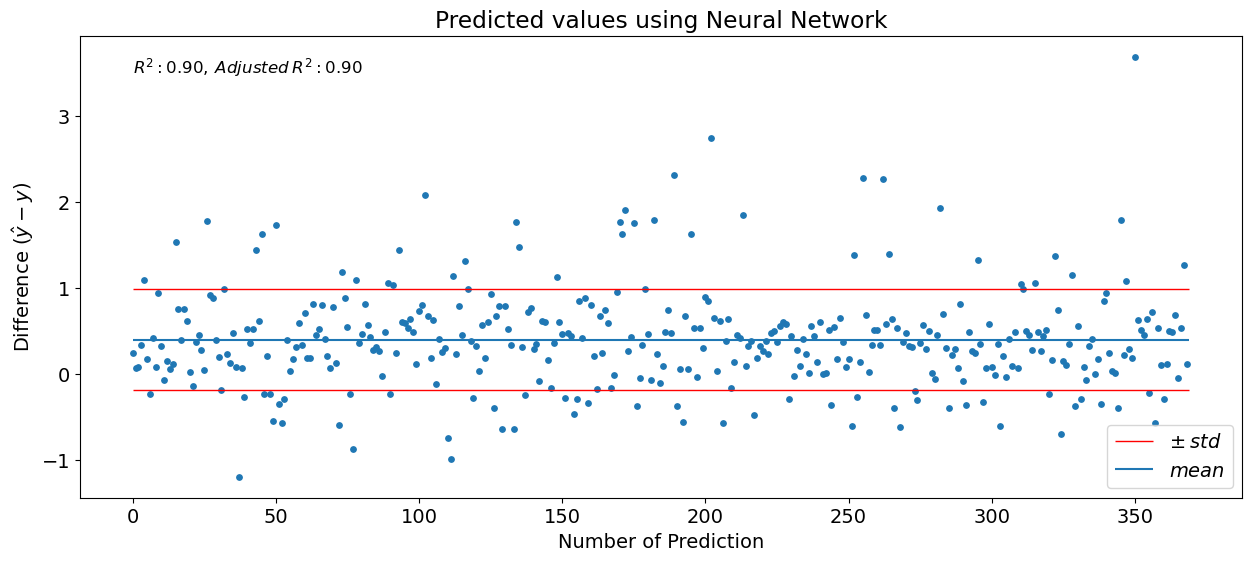

In [176]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Number of Prediction')
plt.ylabel('Difference ($\hat y - y$)')
plt.title('Predicted values using Neural Network')
plt.legend(loc='lower right')
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()

The mean difference is around 0, which is what we want as this indicates that the predicted value is the similar to the actual value. There are still some predictions are outside standard deviation range. 

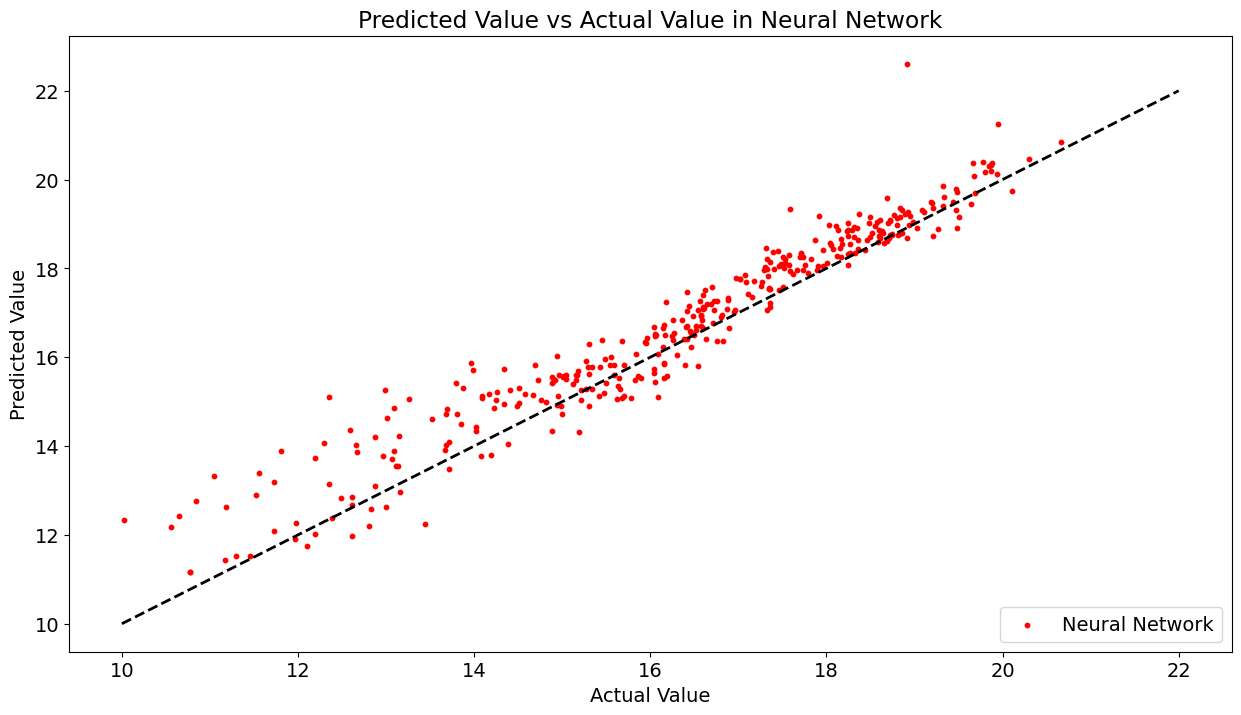

In [177]:
#Plot scatter graph for visualization
plt.figure(figsize=[15,8])
plt.scatter(y_test, predictions, s=10, c='r', label='Neural Network')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted Value vs Actual Value in Neural Network')
plt.legend(loc='lower right')
plt.plot([10, 22], [10, 22], 'k--', linewidth=2)
plt.show()

Pretty much falls near the line, which indicates that Neural Network predict well on values, especially when predicting higher value.

### Scatter Plot of prediction set on different model

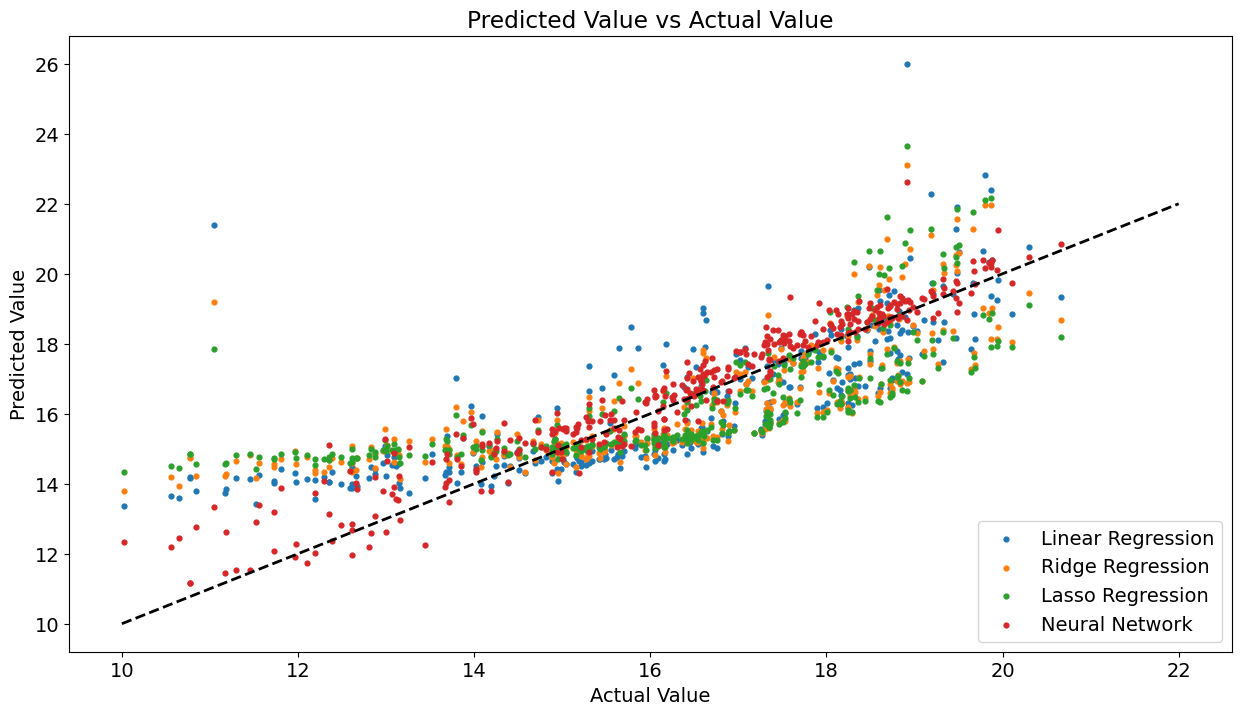

In [178]:
#Plot scatter graph for visualization
plt.figure(figsize=[15,8])
plt.scatter(y_test, y_pred, label='Linear Regression', s=12)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', s=12)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', s=12)
plt.scatter(y_test, predictions, label='Neural Network', s=12)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title( 'Predicted Value vs Actual Value')
plt.plot([10, 22], [10, 22], 'k--', linewidth=2)
plt.legend(loc='lower right')
plt.show()

## Conclusion
High wine production does not mean that they would have high value on wine. Well known county wine has higher value even they have small production. I would say that the Neural Network would be my recommended model to predict the value of county wine.  This model not only works well in popular wine countries, but also works good enough for other wine counties. This means that the model will not only be useful for popular wineries, but also small family businesses in terms of future investment.

## Further Improvements
Some further improvements that I would suggest are to add more features on this dataset, like the climate of each county (such as rainfall, humidity, temperature) or the growing degree day (gdd), which is often used as an indicator in vine development. On the consumer side, we could add the average ratings on each year or each county wine, or number of awards they have as a way to measure the popularity.


### References

https://www.kaggle.com/datasets/jarredpriester/california-wine-production-19802020

https://www.statista.com/statistics/737296/california-wine-us-market-value/


https://weolive.com/discover-california-wines-regions/#:~:text=The%20North%20Coast%20is%20home,is%20also%20a%20designated%20AVA.